# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy import stats
import statsmodels
import statsmodels.stats.weightstats
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

clean_hospital_read_df.tail()

/home/lara/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


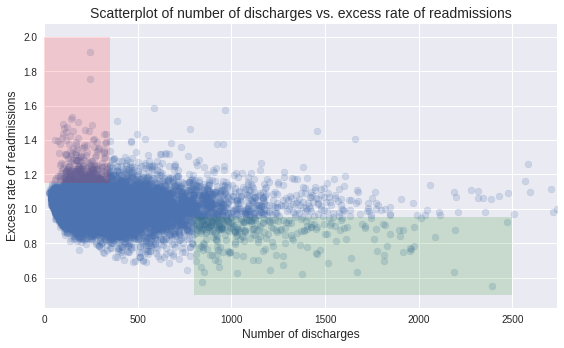

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [5]:
'''
****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****
'''

'\n****\n<div class="span5 alert alert-info">\n### Exercise\n\nInclude your work on the following **in this notebook and submit to your Github account**. \n\nA. Do you agree with the above analysis and recommendations? Why or why not?\n   \nB. Provide support for your arguments and your own recommendations with a statistically sound analysis:\n\n   1. Setup an appropriate hypothesis test.\n   2. Compute and report the observed significance value (or p-value).\n   3. Report statistical significance for $\x07lpha$ = .01. \n   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?\n   5. Look at the scatterplot above. \n      - What are the advantages and disadvantages of using this plot to convey information?\n      - Construct another plot that conveys the same information in a more direct manner.\n\n\n\nYou can compose in notebook cells using Markdown: \n+ In the control panel at the top, choose Cell 

A: No, the analysis and conclusions do not seem sound. Even despite the lack of evidence that the difference found is statistically significant, the assumption that larger hospitals are able to better treat patients due to resources does not seem accurate. There are potenially confounding issues, like the fact that small hospitals are more likely to be in rural areas, so patients would need to visit the same hospital, vs large hospitals tend to be in urban areas. Rural vs Urban areas will likely have different kinds of patients with different kinds of problems. If a large hospital does not give a patient suitable care, that patient can probably go to a different care provider in the future. In a rural area however, patients often do not have this kind of choice. 

### B:
#### Ho (Null Hypothesis) - There is no significant difference in Number of discharges based on Readmission Ratios
#### H1 (experimental hypothesis) - There is a significant difference in Discharges based on Readmission ratio.

In [6]:
#test to verify that the distribution of discharges is normal
scipy.stats.normaltest(clean_hospital_read_df['Number of Discharges'], axis=0, nan_policy='omit')

NormaltestResult(statistic=8412.4477527445197, pvalue=0.0)

### The distribution of Number of Discharges is normal

In [7]:
#Divide hospitals into two groups, one with Readmission ratios of 1 or less, and another group with ratios greater than 1
high = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 1]
low = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] <= 1]

In [8]:
#Difference of means
high['Number of Discharges'].mean() - low['Number of Discharges'].mean()

-30.64261496620219

In [9]:
#T-test between the two groups, using a Welch's test that does not assume equal variances
scipy.stats.ttest_ind(high['Number of Discharges'], low['Number of Discharges'], equal_var=False)

Ttest_indResult(statistic=-5.3079624310074704, pvalue=1.1297290746457647e-07)

### The t-test p-value is 1.13 x 10^-7 or 0.000000113
The difference in means is unlikely to be due to chance and the Null Hypothesis is rejected. The difference in means is statistically significant because the p-value of 0.000000113 is much lower than 0.01.

Statistical significance $\alpha$ = .01 is at a t-score of 2.326

In [10]:
#std dev of the difference of means
stdmeans= np.sqrt((high['Number of Discharges'].std()**2/len(high))+(low['Number of Discharges'].std()**2/len(low)))

In [11]:
#Critical Threshold
stdmeans*2.326

13.427887506328508

"Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?"

Statistical significance determines whether a test statistics is less likely to be due simply to chance, and this is not the most important factor to make a decision on. It does not speak to the real world application of any recommendations that an experiment might lead to. Even if an effect is statistically significant, that does not mean that it actually has large real-world implications. "Practical significance" on the other hand determines how large of an effect there actually is. This is a much more useful thing to know when making real-world decisions. 

Considering potential confounding factors like the one mentioned above (Rural vs Urban hospitals), there should be incentives in place for small capacity hospitals to update their resource allocation, but the continued operation of these hospitals should not be contingent on this. 

Consolidating hospitals is not an appropriate solution, as that will likely restrict care for many people who cannot get around easily. A better recommendation would be instead to analyze the types of complications that are bring patients back to the hospital or to analyze futher to find a factor that more strongly correlates with the Redamission ratio, rather than Number of discharges/size of the hospital. 

The advantages of the plot provided are that the density of the data can be seen, and the color coded boxes allow the viewer to see the trends of th more extreme ends of the data. The disadvantages are however that the color coded boxes mislead the viewer to think more of the data is trending in those directions that they actually are. There are no particular markers to show where the mean of the data is, or how it is trending on the whole, excluding outliers. 

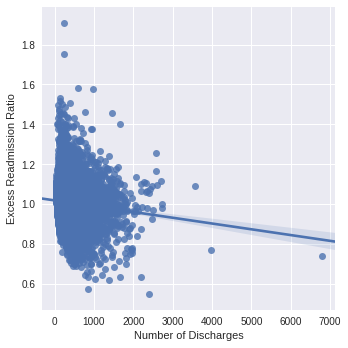

In [12]:
q = sns.FacetGrid(clean_hospital_read_df, size=5)  
q.map(sns.regplot, "Number of Discharges", "Excess Readmission Ratio")  

This plot shows that while there is a negative correlation between Number of Discharges and Excess Readmission Ratio, it is very slight, with a slope of roughly 0.00003

In [16]:
stats.spearmanr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'], nan_policy='omit') 

SpearmanrResult(correlation=2233.0057814445427, pvalue=0.0)